# DMI - homework 3
Students:
Anna Basquet,
Nikola Panajotovic and
Ester Muñoz

In [ ]:
# Provide access to drive in order to load the data
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import discriminant_analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import randint

# 1 
----


### Loading data

In [ ]:
# Load the prostate cancer dataset
df = pd.read_csv('/content/drive/MyDrive/datasets/dmi_3/prostate_data.txt', sep='\t')

In [ ]:
df.drop(columns=['Unnamed: 0', 'train'], inplace=True)

In [ ]:
# Perform quick EDA
display(pd.DataFrame(df.isnull().sum()).T) # Check for missing values
print()
df.describe() # Check for outliers and the distribution of each feature


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,0,0,0,0,0,0,0,0,0


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [ ]:
X = df[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = df ['lpsa']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Do not forget to perform feature selection!

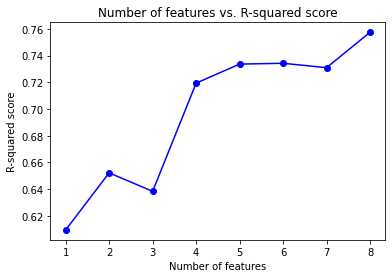

In [ ]:
# Define the range of k values to try
k_values = np.arange(1, X.shape[1] + 1)

# Create a list to store the R-squared scores for each value of k
r2_scores = []

# Loop over each value of k and train a model with that number of features
for k in k_values:
  selector = SelectKBest(score_func=f_regression, k=k)
  selector.fit_transform(X_train, y_train)
  selected_features = X_train.columns[selector.get_support()]

  model = LinearRegression()
  model.fit(X_train[selected_features], y_train)

  r2_scores.append(model.score(X_test[selected_features], y_test))

# Plot the results
plt.plot(k_values, r2_scores, 'bo-')
plt.xlabel('Number of features')
plt.ylabel('R-squared score')
plt.title('Number of features vs. R-squared score')
plt.show()


    Four features seem to be enough.

### Use the prostate cancer dataset to train a model that predicts log of prostate-specific antigen.

R-squared score on test set: 0.719382267266006
Selected features: ['lcavol', 'lweight', 'svi', 'lcp'] 




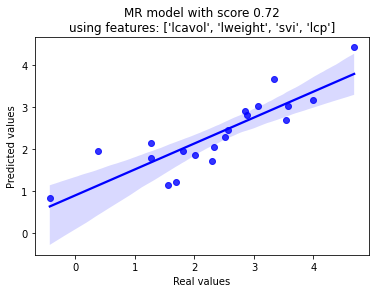

In [ ]:
# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=4)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

# Train a linear regression model using the selected features
model = LinearRegression()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])

mr_score = model.score(X_test[selected_features], y_test)
# Evaluate the performance of the model on the test set
print('R-squared score on test set:', mr_score)
print('Selected features:',list(selected_features), '\n\n')

# sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title(f'MR model with score {round(mr_score,2)}\n\
using features: {list(selected_features)}')
plt.show()

# 2
-------

Use the breast cancer dataset to train a model that predicts whether a future tumor image (with unknown diagnosis) is a benign or malignant tumor.

Try different machine learning algorithms such as:
- KNNs
- Decision trees
- Random forest
- Logistic Regression

Do not forget to perform hyperparameter tuning!

Generate a ROC curve for all the models.


Which of all models performs better for this data? Discuss.



## Loading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/dmi_3/breat_cancer_data.csv')

In [ ]:
df = df.set_index('id')

In [ ]:
df = df.drop(columns='Unnamed: 32')

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
y = df['diagnosis']
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

## 1) KNN

### Feature selection

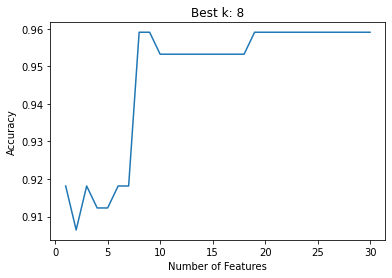

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create lists to store the values of k and the corresponding accuracy
k_values = []
accuracy_values = []

# Iterate over different values of k
for k in range(1, len(X_train.columns) + 1):
    # Select the top k features using mutual information-based feature selection
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)
    
    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_train_new, y_train)
    
    # Evaluate the accuracy of the model
    accuracy = knn.score(X_test_new, y_test)
    
    # Append the values of k and the corresponding accuracy to the lists
    k_values.append(k)
    accuracy_values.append(accuracy)

# Print the value of k with the highest accuracy
best_k = k_values[accuracy_values.index(max(accuracy_values))]

# Plot the values of k and the corresponding accuracy
plt.plot(k_values, accuracy_values)
plt.title(f"Best k: {best_k}")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.show()



### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the top 8 features using mutual information-based feature selection
selector = SelectKBest(mutual_info_classif, k=8)
X_new = selector.fit_transform(X, y)

# Define the parameter grid for KNN
param_grid = {'n_neighbors': [i for i in range(3, 50, 2)], 'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_new, y)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 35, 'weights': 'distance'}
Best Accuracy: 0.9209594783418723


### Performing KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Train a KNN classifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                            weights=grid_search.best_params_['weights'])
knn.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Store knn model's accuracy
knn_accuracy = accuracy


Accuracy: 0.935672514619883


### Performance plots

#### Confusion matrix

<AxesSubplot:>

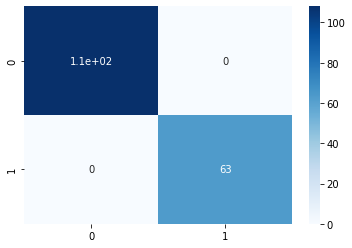

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')


#### ROC curve

Text(0.5, 1.0, 'ROC Curve')

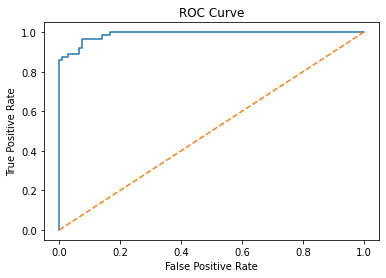

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = knn.predict_proba(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


## 2) Decision trees

### Feature selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Select features based on the importance threshold
sfm = SelectFromModel(clf, threshold=0.1)
X_train_new = sfm.fit_transform(X_train, y_train)
X_test_new = sfm.transform(X_test)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top K features using ANOVA F-value based feature selection
selector = SelectKBest(f_classif, k=8)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)


### Hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_new, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 4}
Best Accuracy: 0.944746835443038


### Creating Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with the best hyperparameters
clf = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], 
                             min_samples_split=grid_search.best_params_['min_samples_split'])

# Train the classifier on the selected features
clf.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_new)

# Obtain accuracy of the model
dt_accuracy = clf.score(X_test_new, y_test)


### Visualising Decision Tree

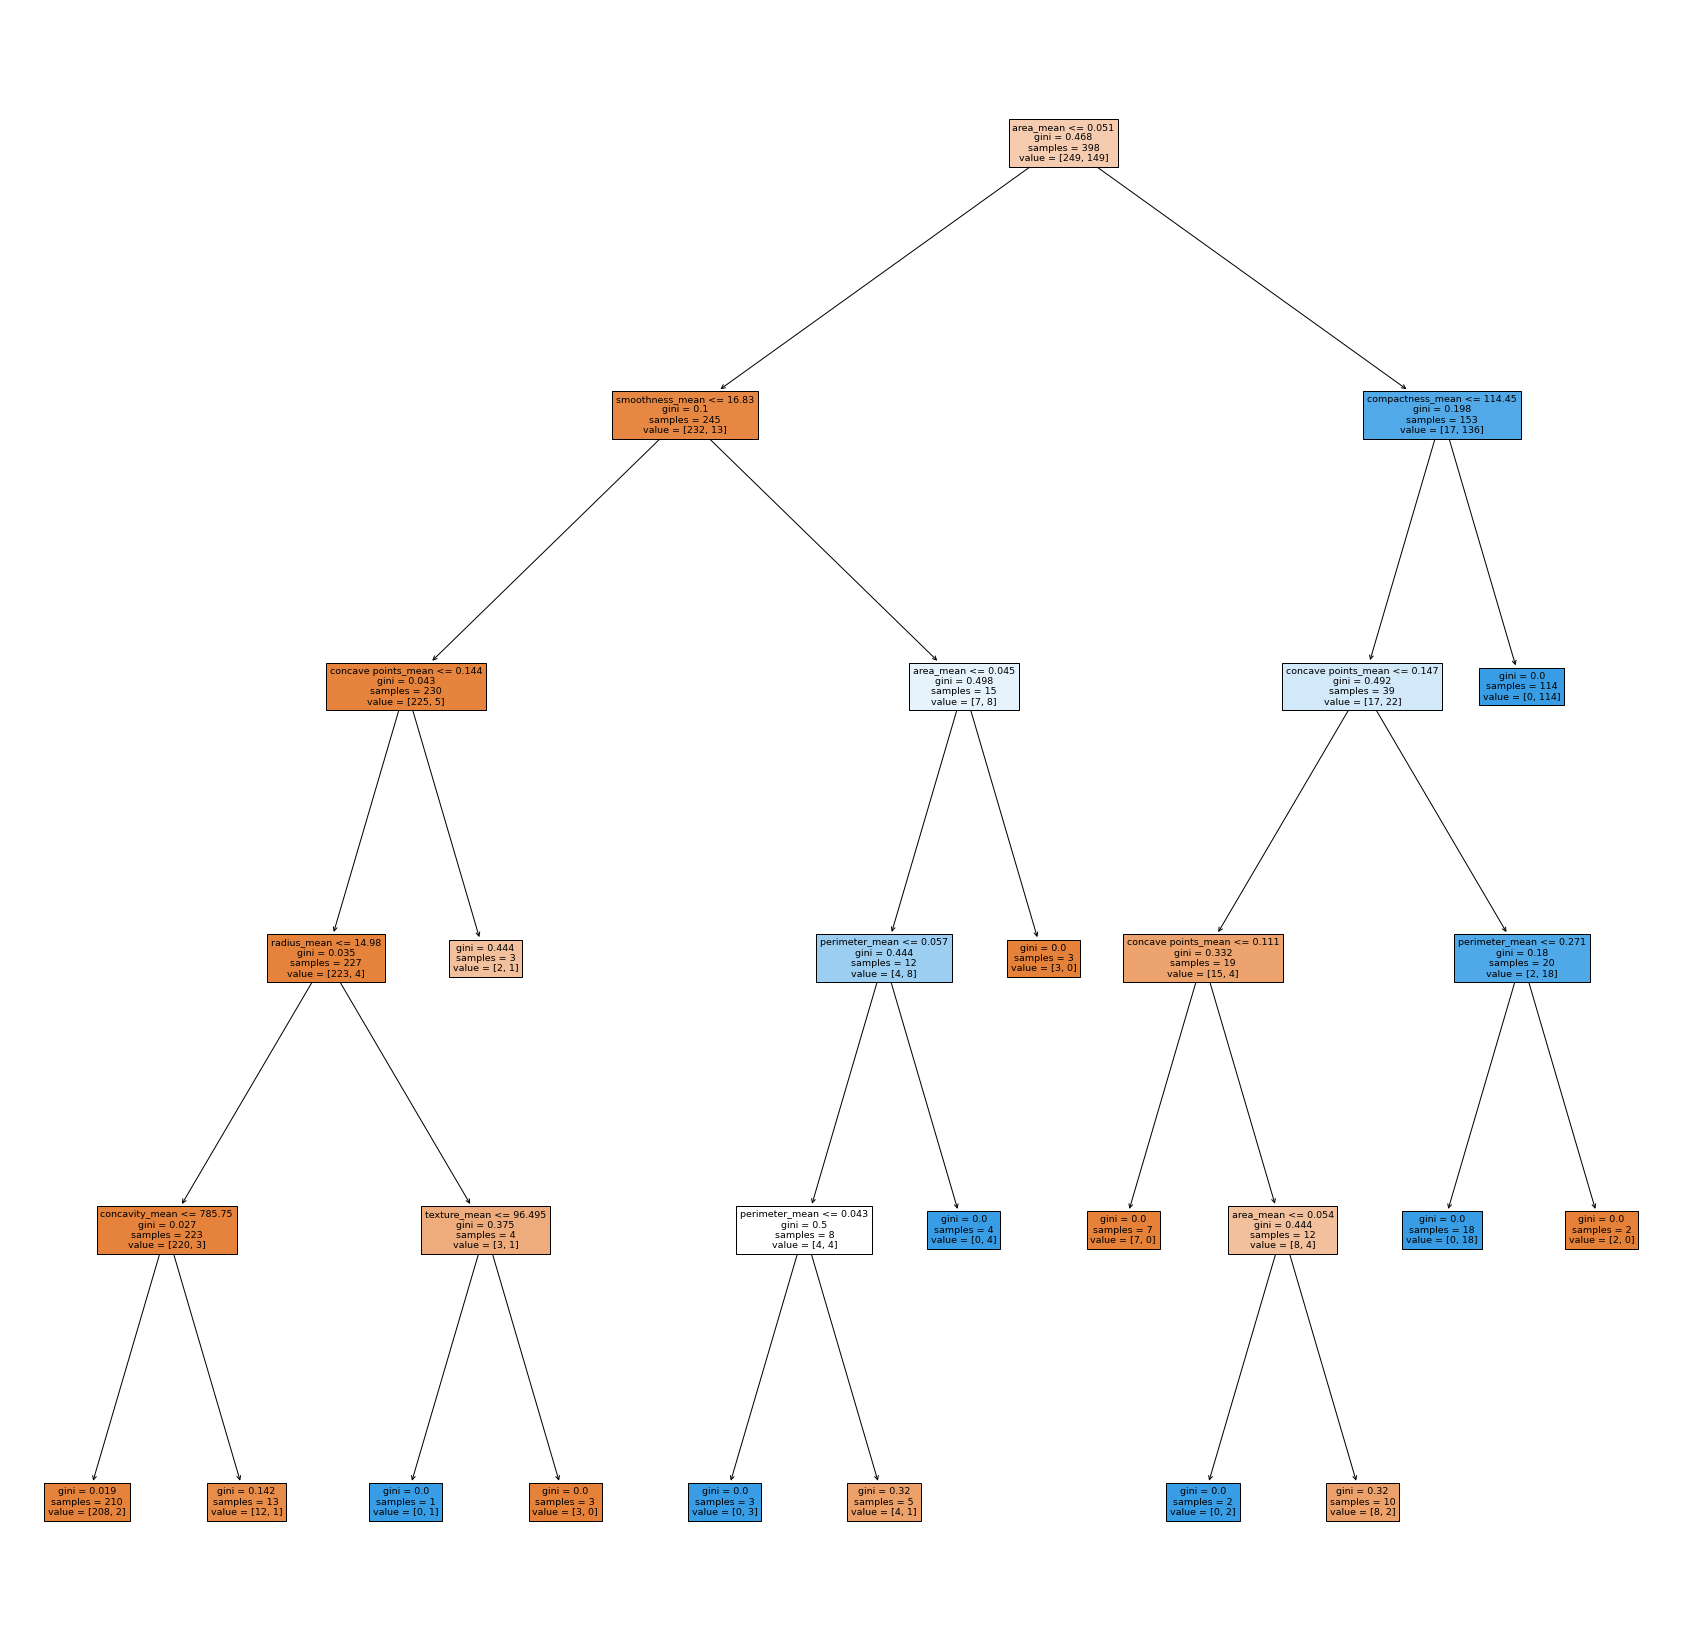

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the column names
feature_names = X.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(30, 30))
plot_tree(clf, filled=True, feature_names=feature_names)
plt.show()

### Performance plots

#### Confusion matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


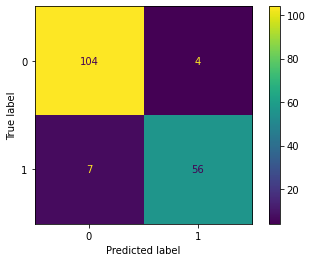

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# Plot the confusion matrix
plot_confusion_matrix(clf, X_test_new, y_test)
plt.show()


#### ROC curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


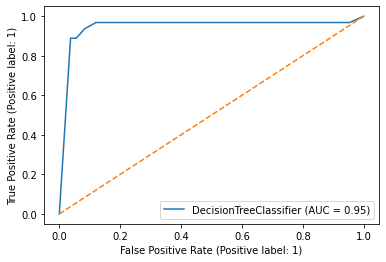

In [ ]:
# Plot the ROC curve
plot_roc_curve(clf, X_test_new, y_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()


## 3) Random forest

### Feature selection and hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Perform feature selection using random forest
selector = SelectFromModel(RandomForestClassifier())
X_new = selector.fit_transform(X, y)

# Define the parameter grid for random forest
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6]}

### Creating model

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_new, y)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit a random forest classifier with the best hyperparameters
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_new, y)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100}
Best Accuracy: 0.9508306163639185


RandomForestClassifier(max_depth=3, min_samples_split=6)

### Performance plots

#### Confusion matrix

Accuracy: 0.9630931458699473


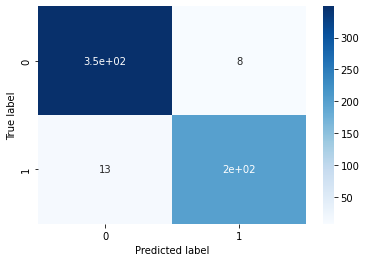

In [ ]:
# Make predictions and evaluate the model
y_pred = rf_best.predict(X_new)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print("Accuracy:", accuracy)

sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Store random forest model's accuracy
rf_accuracy = accuracy

#### Feature importance

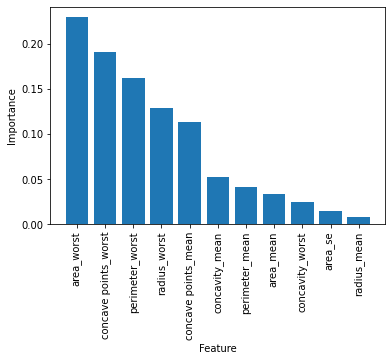

In [ ]:
importances = rf_best.feature_importances_
feature_names = X.columns[selector.get_support()]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names in descending order
sorted_feature_names = feature_names[indices]

# Rearrange feature importances in descending order
sorted_importances = importances[indices]

# Plot sorted feature importances
plt.bar(sorted_feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### ROC curve

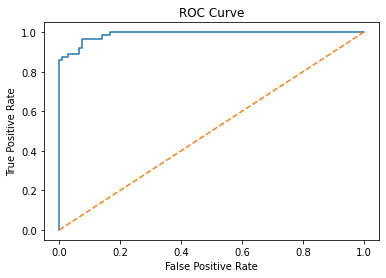

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## 4) Logistic regression

### Feature selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

# Perform feature selection using logistic regression with L1 penalty
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
X_new = selector.fit_transform(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Hyperparameter tuning

In [ ]:
# Define the parameter grid for logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression classifier
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_new, y)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Best Hyperparameters: {'C': 1}
Best Accuracy: 0.9508150908244062


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Performing logistic regression

In [ ]:
# Fit a logistic regression classifier with the best hyperparameters
lr_best = LogisticRegression(penalty='l1', solver='liblinear', **grid_search.best_params_)
lr_best.fit(X_new, y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, penalty='l1', solver='liblinear')

### Performance plots

### Confusion matrix

Accuracy: 0.9578207381370826


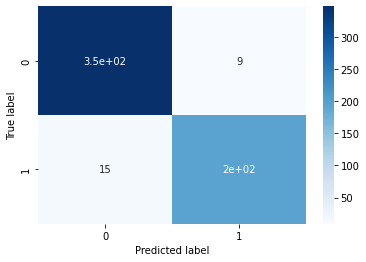

In [ ]:
# Make predictions and evaluate the model
y_pred = lr_best.predict(X_new)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print("Accuracy:", accuracy)

sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Store logistic regresion model's accuracy
logreg_accuracy = accuracy

#### Feture imortance

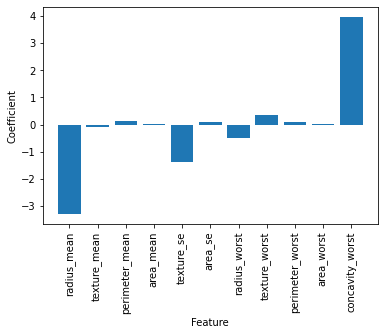

In [ ]:
# Visualize feature importances
coef = lr_best.coef_.ravel()
feature_names = X.columns[selector.get_support()]
plt.bar(feature_names, coef)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()

#### ROC curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


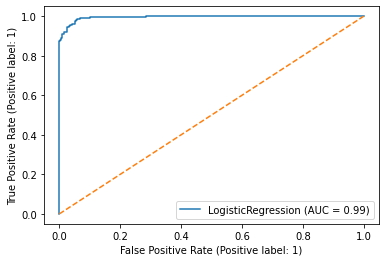

In [ ]:
# Plot ROC curve
plot_roc_curve(lr_best, X_new, y)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()


## Which of all models performs better for this data? Discuss.

KNN model accuracy on test data: 0.935673
DECISION TREE model accuracy on test data: 0.935673
RANDOM FOREST model accuracy on test data: 0.963093
LOGISTIC REGRESSION model accuracy on test data: 0.957821


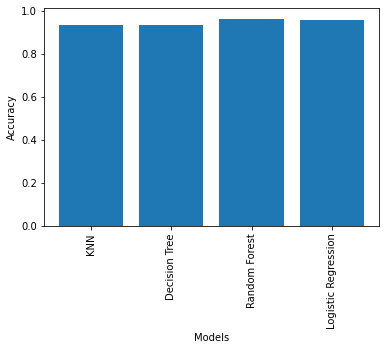

In [ ]:
print("KNN model accuracy on test data: %.6f" % knn_accuracy)
print("DECISION TREE model accuracy on test data: %.6f" % dt_accuracy)
print("RANDOM FOREST model accuracy on test data: %.6f" % rf_accuracy)
print("LOGISTIC REGRESSION model accuracy on test data: %.6f" % logreg_accuracy)

plt.bar(["KNN", "Decision Tree", "Random Forest", "Logistic Regression"], [knn_accuracy, dt_accuracy, rf_accuracy, logreg_accuracy])
plt.xticks(rotation=90)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

We can see that the computed accuracies of the different models are quite high, all above 0.9. However the **random forest calssifier** is the one with the highest accuracy classifying the test data, with a score of 0.96.


#3
-----

### Load data

In [3]:
# Since all the samples in one file is too big for github, we upload the 2 cancer types separately and then join them in one data frame
# no files need to be downloaded, the link to github retrieves them.
blca_df = pd.read_csv('https://raw.githubusercontent.com/upf-dmi-2021/homework-3-emunozdc/main/blca_data.tsv', sep='\t', index_col = 0)
lgg_df = pd.read_csv('https://raw.githubusercontent.com/upf-dmi-2021/homework-3-emunozdc/main/lgg_data.tsv', sep='\t', index_col = 0)
full_df = pd.concat([blca_df, lgg_df])

### Algorithm 1: Linear Discrimination Analysis
This one carries out a dimensional reduction

In [ ]:
# Join datasets and split X (predictor variables) and y (response variable)
X=full_df.iloc[:,:-1].values
y=full_df.iloc[:,len(full_df.columns)-1].values

In [ ]:
# Fit LDA model
model = discriminant_analysis.LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
# Train and evaluate model with 10 fold and 5 cross-validations
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Model performance: %.3f" % np.mean(scores)) # Get scores

Model performance: 1.000


Add some plots

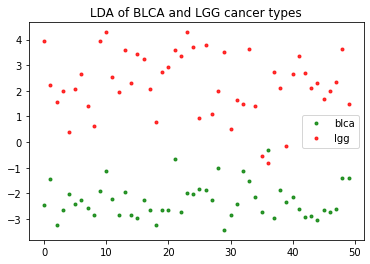

In [ ]:
# Define data to plot
data_plot = model.fit(X, y).transform(X)

# Plot
plt.figure()
for color, cancer_type in zip(["g", "r"], ["blca", "lgg"]):
    plt.plot(data_plot[y == cancer_type], alpha=.8, linestyle = "", marker = ".",
             color=color, label=cancer_type)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('LDA of BLCA and LGG cancer types')

plt.show()

Here we can see in green the BLCA samples and in red the LGG samples. The model is able to perform a good separation of the cancer types, although is not perfect.

### Algorithm 2: Random Forest Classifier

In [ ]:
# Create test (10 samples) and train (40 samples) data
train_data = pd.concat([full_df[full_df["cancer_tag"] == "blca"].sample(n = 40), 
                       full_df[full_df["cancer_tag"] == "lgg"].sample(n = 40)])
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:,-1]


test_data = full_df.drop(train_data.index)
test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:,-1]

#train_x = pd.concat([blca_df.iloc[:40, :-1], lgg_df.iloc[:40, :-1]])
#train_y = pd.concat([blca_df.iloc[:40, -1], lgg_df.iloc[:40, -1]]) # tags
#test_x = pd.concat([blca_df.iloc[40:, :-1], lgg_df.iloc[40:, :-1]])
#test_y = pd.concat([blca_df.iloc[40:, -1], lgg_df.iloc[40:, -1]]) # tags

In [ ]:
# Hyperparameter tunning
param_dist = {'n_estimators': randint(500,1500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, 
                                 n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f621a1637f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f621a938970>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Print the best accuracy
test_y_pred = best_rf.predict(test_x)
accuracy = accuracy_score(test_y, test_y_pred)
print("Accuracy of the best estimator:", accuracy)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 986}
Accuracy of the best estimator: 1.0


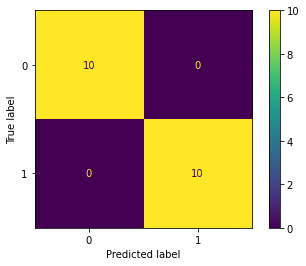

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_y, test_y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

It seems to make a good classification.

<AxesSubplot:>

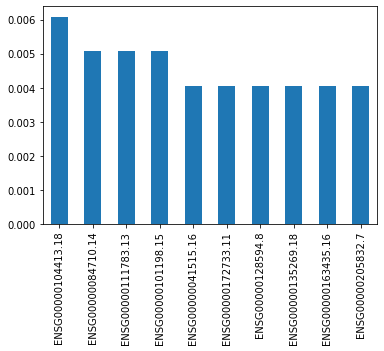

In [ ]:
# Create a Series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot importances as bars from the top 10 features
feature_importances[:10].plot.bar() # These are very low because many features are used